#### Imports

In [1]:
from sympy import Symbol, diff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x_symbol = Symbol('x')

#### Functions

In [2]:
f = [
  lambda x: np.power(x,10) - 1, 
  lambda x: np.exp(x) - 3 * x, 
  lambda x: np.power(x,3) - (9 * x) + 5,
  lambda x: 2 * np.power(x,3) + (5 * np.power(x,2)) - (8 * x) - 1,
  lambda x: 3 * np.power(x,2) - 9,
  lambda x: np.power(x,3) - (9 * x) + 3,
  lambda x: np.power(x,2) + x - 6
  ]


##### Auxiliar Function

In [3]:
def plot_func(f, x_min, x_max, n, points):
  x = np.linspace(x_min, x_max, n)
  y = np.array([f(i) for i in x])
  plt.figure(dpi=120)
  plt.plot(x, y)
  plt.plot(points.iloc[:, 0], points.iloc[:, 1], 'ro')
  plt.grid(True)
  plt.show()

def eval_derivate(f, x):
  return float(diff(f(x_symbol), x_symbol).subs(x_symbol, x))

#### Root-finding algorithms

##### Bissection Method

In [4]:
def bissec(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a + b) / 2

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': M, 'f(a)*f(x)': f(a)*f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = (a + b) / 2
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': f(a), 'f(a)*f(x)': f(a)*f(x)}, ignore_index=True)

    k += 1

  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])

  return df

 

##### False Position Method

In [5]:
def false_position(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a * f(b)) - (b * f(a)) / (f(b) - f(a))

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = a * f(b) - b * f(a) / (f(b) - f(a))
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x)}, ignore_index=True)

    k += 1
  
  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])
  
  return df

##### Newton Raphson

In [6]:
def newton_raphson(x0, precision, iterations, f, x_min, x_max):
  initial_data = {'x(n)': x0, 'f(x(n))': f(x0)}
  df = pd.DataFrame(initial_data, index=[1])
  
  if abs(f(x0)) < precision:
    return df

  x = x0 - f(x0) / eval_derivate(f, x0)
  df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)

  k = 1

  while k < iterations and abs(f(x)) > precision:
    x = x - f(x) / eval_derivate(f, x0)
    df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)
    k += 1
  
  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, x_min, x_max, 100, df.iloc[:, [0, 1]])
  
  return df

##### Secant

In [7]:
def secant(x0, x1, precision, iterations, f, x_min, x_max):
  initial_data = {'x(n)': x0, 'f(x(n))': f(x0)}

  df = pd.DataFrame(initial_data, index=[1])
  df = df.append({'x(n)': x1, 'f(x(n))': f(x1)}, ignore_index=True)
  
  if abs(f(x0)) < precision or abs(f(x1)) < precision:
    return df

  x = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))

  df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)

  k = 1

  while k < iterations and abs(f(x)) > precision:
    x0 = x1
    x1 = x

    x = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))
    df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)
    k += 1
  
  print(f'Root: {round(x, 4)}, f(x): {round(f(x), 4)}, Iterations: {k}')

  plot_func(f, x_min, x_max, 100, df.iloc[:, [0, 1]])
  
  return df

#### Comparative Function

In [28]:
def compare(func, precision, iterations, a, b, x0, x1, x_min, x_max):
  res1 = bissec(a, b, precision, iterations, func)
  res2 = false_position(a, b, precision, iterations, func)
  res3 = newton_raphson(x0, precision, iterations, func, x_min, x_max)
  res4 = secant(x0, x1, precision, iterations, func, x_min, x_max)

  initial_data = {
    'Bisseção': f'[{a},{b}]', 
    'Posição Falsa': f'[{a},{b}]', 
    'Newton-Raphson': f'x0 = {x0}', 
    'Secante': f'x0 = {x0}, x1 = {x1}'
    }

  df = pd.DataFrame(initial_data, index=['Dados Iniciais'])
  df = df.append({'Bisseção': res1.iloc[-1]['x'], 
    'Posição Falsa': res2.iloc[-1]['x'], 
    'Newton-Raphson': res3.iloc[-1]['x(n)'],
    'Secante': res4.iloc[-1]['x(n)']}, 
    index=['Raiz'])

  return df

In [ ]:
compare(f[5], 0.01, 5, 0, 1, 0.75, 0.9, 0, 1)

#### Results

Root: 0.5938, f(x): -0.1344, Iterations: 5


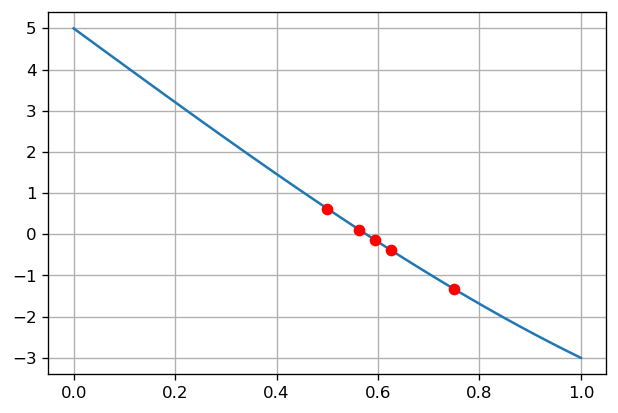

,a,b,x,f(x),f(a),f(a)*f(x)
0,0.0000,1.000,0.50000,0.625000,5.000000,3.125000
1,0.5000,1.000,0.75000,-1.328125,0.625000,-0.830078
2,0.5000,0.750,0.62500,-0.380859,0.625000,-0.238037
3,0.5000,0.625,0.56250,0.115479,0.625000,0.072174
4,0.5625,0.625,0.59375,-0.134430,0.115479,-0.015524


In [27]:
bissec(0, 1, 0.01, 5, f[2])

Root: 0.3379, f(x): -0.0024, Iterations: 4


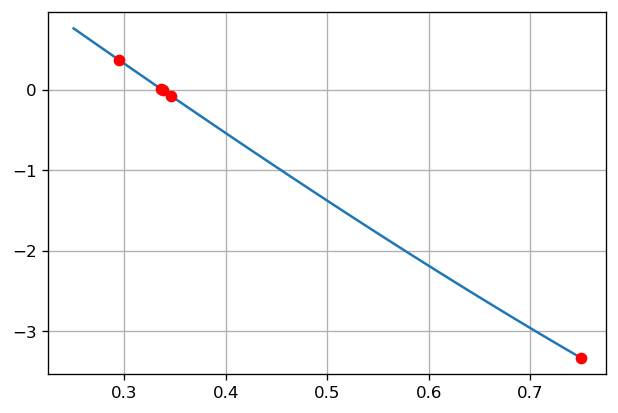

,x(n),f(x(n))
0,0.750000,-3.328125
1,0.294872,0.371793
2,0.345715,-0.070118
3,0.336127,0.012837
4,0.337882,-0.002364


In [10]:
newton_raphson(0.75, 0.01, 5, f[5], 0.25, 0.75)

Root: 2.0, f(x): -0.0001, Iterations: 3


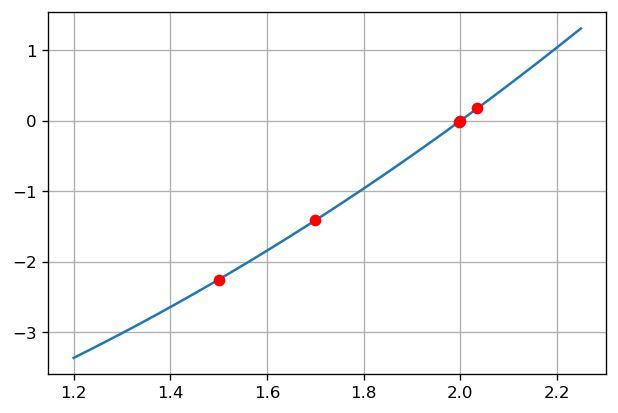

,x(n),f(x(n))
0,1.500000,-2.250000
1,1.700000,-1.410000
2,2.035714,0.179847
3,1.997738,-0.011307
4,1.999984,-0.000080


In [ ]:
secant(1.5, 1.7, 0.01, 5, f[6], 1.2, 2.25)

Root: -0.0002, Iterations: 4


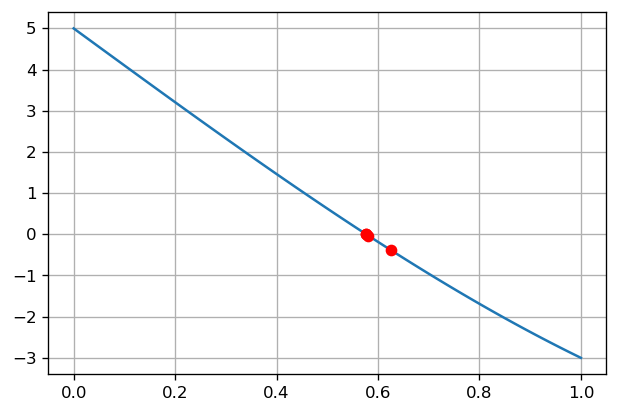

,a,b,x,f(x)
0,0.0,1.000000,0.625000,-0.380859
1,0.0,0.625000,0.580762,-0.030978
2,0.0,0.580762,0.577186,-0.002390
3,0.0,0.577186,0.576910,-0.000184


In [ ]:
false_position(0, 1, 0.0005, 5, f[2])

Root: 120.5802, Iterations: 5


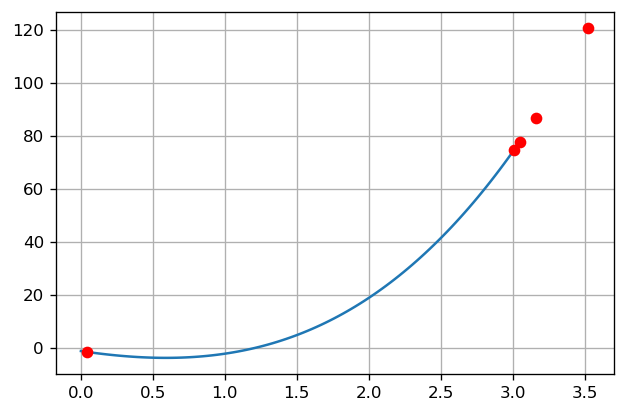

,a,b,x,f(x)
0,0.00,3.000000,0.040000,-1.311872
1,0.04,3.000000,3.012258,74.935035
2,0.04,3.012258,3.049229,77.797386
3,0.04,3.049229,3.162461,86.962658
4,0.04,3.162461,3.525505,120.580152


In [ ]:
false_position(0, 3, 0.05, 5, f[3])